**CMPE 462 Project - Phase 3**
**Group 13: Doğukan Türksoy- Şefika Akman**

**Question 1. Support Vector Machine.**

**1-b)**

x =
$\left[\begin{array}{ccc}
0 & 0\\
0 & -1\\
-2 & 0
\end{array}\right]$
y =
$\left[\begin{array}{ccc}
-1\\
-1\\
1
\end{array}\right]$

-b >= 1 ,
-(-w2 + b) >= 1 ,
-2 * w1 + b >=1 ,
w2 - b >= 1,
-b >= 1 so, w2 >= 0 ,
-2 * w1 + b >=1 ,
-b >= 1 , so w1 <= -1

(1/2) * wT * w = (1/2) * (w1 * 2 + w2 * 2) >= 1/2
w1 = =1 , w2 = 0 , b = =1.

**1-e)**

In [ ]:
import numpy as np
from numpy import reshape
import os.path as path
import os as os
from os import listdir
from os.path import isfile, join, isdir
from PIL import Image
from sklearn import svm
from sklearn import preprocessing
from sklearn import utils
def taken_data(train_path = "3dshapes_train", test_path = "3dshapes_test"):
    train_images = np.array([np.asarray(Image.open(f"{train_path}/{i}.jpg")) for i in range(10000)])
    train_labels = np.load(r"C:\Users\Bilgisayar\Desktop/orientations_train.npy")[:10000]
    test_images = np.array([np.asarray(Image.open(f"{test_path}/{i}.jpg")) for i in range(1000)])
    test_labels = np.load(r"C:\Users\Bilgisayar\Desktop/orientations_test.npy")[:1000]

    gray_train_images = np.zeros((train_images.shape[0], train_images.shape[1], train_images.shape[2]))
    gray_test_images = np.zeros((test_images.shape[0], test_images.shape[1], test_images.shape[2]))

    gray_train_images[:, :, :] = train_images[:, :, :, 0] * 0.2989 + train_images[:, :, :, 1] * 0.5870 + train_images[:, :, :, 2] * 0.1140
    gray_test_images[:, :, :] = test_images[:, :, :, 0] * 0.2989 + test_images[:, :, :, 1] * 0.5870 + test_images[:, :, :, 2] * 0.1140

    flatten_train_images = gray_train_images.reshape(gray_train_images.shape[0], gray_train_images.shape[1]*gray_train_images.shape[2])
    flatten_test_images = gray_test_images.reshape(gray_test_images.shape[0], gray_test_images.shape[1]*gray_test_images.shape[2])

    print("Size of the training matrix: ", flatten_train_images.shape)

    return flatten_train_images, train_labels, flatten_test_images, test_labels

In [ ]:
root_path = r'C:\Users\Bilgisayar\Desktop'
train_folder, test_folder = join(root_path, "3dshapes_train") , join(root_path, "3dshapes_test")
train_data, train_label, test_data, test_label = taken_data(train_path = train_folder, test_path = test_folder) #We used take data function from Phase1

In [ ]:
lab_enc = preprocessing.LabelEncoder()
train_label, test_label = lab_enc.fit_transform(train_label) ,lab_enc.fit_transform(test_label) #encodes the label data

clf.fit(train_data, train_label) #train the model
test_results = clf.predict(test_data) #test the model
print("Multi-class accurracy: " , sum([1 for i in range(len(test_results)) if test_results[i] == test_label[i]])/len(test_results)) #prints the accurracy

**1-f)**

In [ ]:
binary_train_classes = [i for i in range(len(train_label)) if train_label[i] == 0 or train_label[i] == 1]  #selects 2 classes for train data
binary_test_classes = [i for i in range(len(test_label)) if test_label[i] == 0 or test_label[i] == 1]  #selects 2 classes for test data

bin_train_label, bin_train_data = [train_label[i] for i in binary_train_classes] , [train_data[i] for i in binary_train_classes] # takes only those 2 classes for train
bin_test_label, bin_test_data = [test_label[i] for i in binary_test_classes] , [test_data[i] for i in binary_test_classes] # takes only those 2 classes for test

clf.fit(bin_train_data, bin_train_label) #train the binary data
test_results = clf.predict(bin_test_data) #test the binary data
print("Binary class accuracy: ", sum([1 for i in range(len(test_results)) if test_results[i] == bin_test_label[i]])/len(test_results)) #prints the accuracy


**Question 2. k-Means Clustering and Gaussian Mixture Models.**
Importing libraries:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

**2-a)**

References:
https://medium.com/analytics-vidhya/sampling-from-gaussian-mixture-models-f1ab9cac2721

In [ ]:
def sample(n=500):
    means = [np.array([0, 1]), np.array([1, 0]), np.array([-1, 0]), np.array([0, -1])]
    variances = [np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]])]
    pis = np.array([0.25, 0.25, 0.25, 0.25])
    a_pis = [np.sum(pis[:i]) for i in range(1, len(pis)+1)]

    sampled_data0 = []
    sampled_data1 = []
    sampled_labels = []
    for i in range(n):
        r = np.random.uniform(0, 1)
        k = 0
        for j, threshold in enumerate(a_pis):
            if r < threshold:
                k = j
                break
        selected_mean = means[k]
        selected_variance = variances[k]

        lambda_, gamma_ = np.linalg.eig(selected_variance)
        dimensions = len(lambda_)
        y_s = np.random.uniform(0, 1, size=(dimensions*1, 3))
        x_normal = np.mean(np.log(y_s/(1-y_s)), axis=1).reshape((-1, dimensions))
        x_multi = (x_normal*lambda_) @ gamma_ + selected_mean

        sampled_data0.append(x_multi[0, 0])
        sampled_data1.append(x_multi[0, 1])
        sampled_labels.append(k)

    return sampled_data0, sampled_data1, sampled_labels

**2-b)**

In [ ]:
def k_means(data_points, cluster_count=4, epsilon=0.0001):
    cluster_centers = np.copy(data_points[np.floor(np.random.uniform(0, 100, cluster_count)).astype(int)])
    cluster_center_memory = [cluster_centers]
    label_memory = []
    objective_value_memory = []
    data_count = data_points.shape[0]
    x_organizer = np.zeros(cluster_count).astype(int)
    y_organizer = np.ones(cluster_count).astype(int)
    label_organizer = np.arange(0, data_count)
    difference = 9999999999
    i = 0
    while difference > epsilon:
        i += 1
        cluster_differences = np.sqrt(np.square(data_points[:, x_organizer].reshape(-1, cluster_count) -
                                                cluster_centers[:, 0].reshape(-1)) +
                                      np.square(data_points[:, y_organizer].reshape(-1, cluster_count) -
                                                cluster_centers[:, 1].reshape(-1)))
        labels = np.argmin(cluster_differences, axis=1)
        distances = np.sqrt(np.square(data_points[label_organizer, 0] - cluster_centers[labels[label_organizer], 0]) +
                            np.square(data_points[label_organizer, 1] - cluster_centers[labels[label_organizer], 1]))
        objective_value = np.sum(distances)
        objective_value_memory.append(objective_value)
        mask = np.zeros((data_count, cluster_count))
        mask[label_organizer, labels[label_organizer]] = 1
        found_center_counts = np.sum(mask, axis=0)

        determiner = np.zeros((data_count, cluster_count, 2))
        determiner[label_organizer, labels[label_organizer], :] = data_points[label_organizer]
        total = np.sum(determiner, axis=0)
        new_cluster_centers = np.divide(total, found_center_counts.reshape(-1, 1))
        new_cluster_centers[found_center_counts == 0] = cluster_centers[found_center_counts == 0]
        difference = np.sqrt(np.square(new_cluster_centers[:, 0].reshape(-1, cluster_count) -
                                       cluster_centers[:, 0].reshape(-1)) +
                             np.square(new_cluster_centers[:, 1].reshape(-1, cluster_count) -
                                       cluster_centers[:, 1].reshape(-1)))
        difference = np.sum(difference, axis=1)[0] / cluster_count
        label_memory.append(labels)
        cluster_center_memory.append(new_cluster_centers)
        cluster_centers = new_cluster_centers
    return cluster_center_memory, label_memory, objective_value_memory

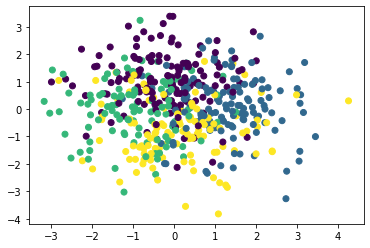

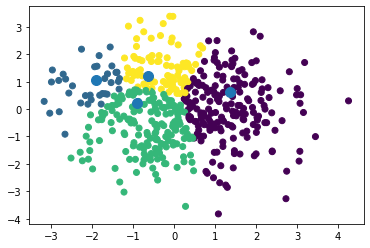

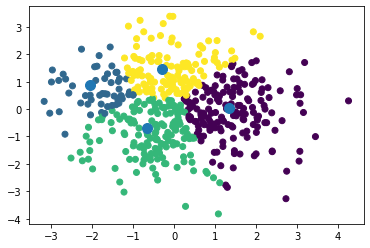

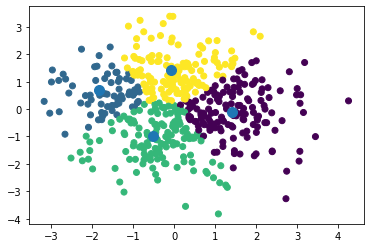

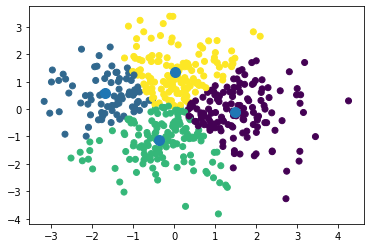

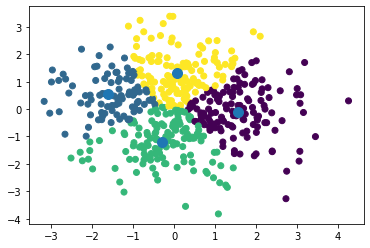

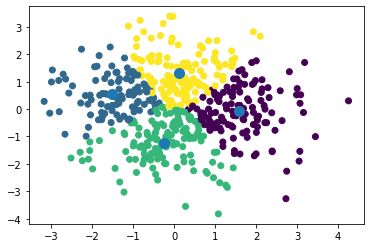

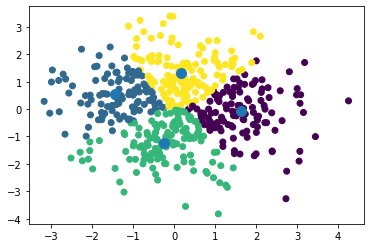

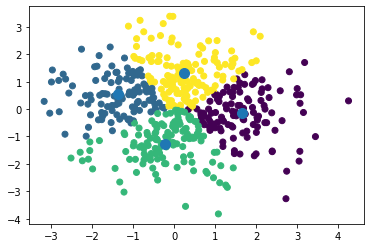

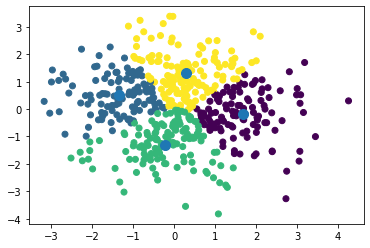

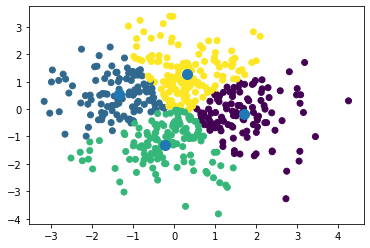

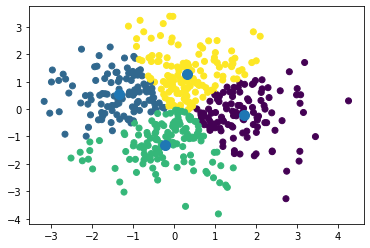

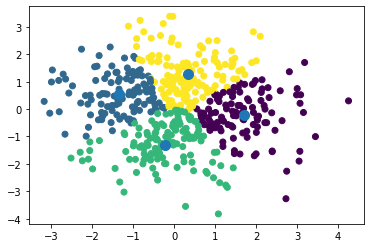

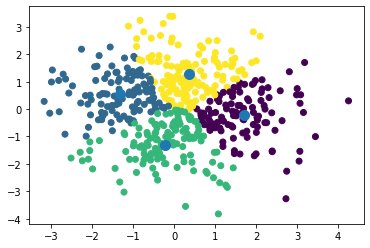

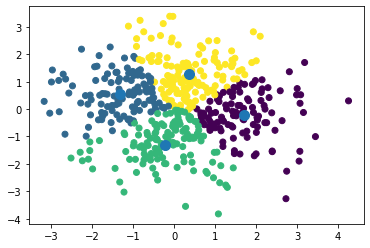

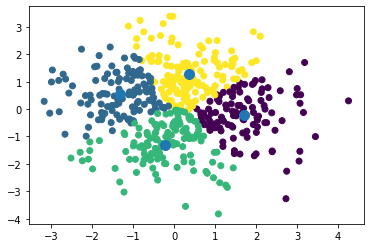

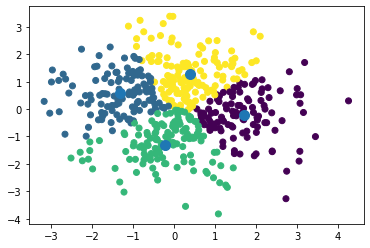

In [ ]:
data0, data1, labels = sample(n=500)

input_data = np.zeros((len(data0), 2))
for d in range(len(data0)):
    input_data[d, 0] = data0[d]
    input_data[d, 1] = data1[d]

plt.scatter(data0, data1, c=labels)
plt.show()

c_memory, l_memory, o_memory = k_means(input_data)
for c_now, l_now in zip(c_memory, l_memory):
    plt.scatter(data0, data1, c=l_now)
    plt.scatter(c_now[:, 0], c_now[:, 1], s=100)
    plt.show()